In [109]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
from time import time

In [110]:
data = yf.download("KO")
growth_rate= np.array((data["Close"]-data["Open"]))/data["Open"]+1

mean=np.mean(growth_rate)
stdev=np.std(growth_rate)

[*********************100%***********************]  1 of 1 completed


In [111]:
def uniform_generator(prev: int)->int: #return is in interval [0,2**32]
    mod=2 ** 32
    a=1103515245
    b=12345
    return(a*prev+b)%mod

In [112]:
def hastings_approx(u:float)->int:
    c0=2.515517
    c1=0.802853
    c2=0.010328
    d1=1.432788
    d2=0.189269
    d3=0.001308
    Hz=np.float64(1-u)
    if Hz > 0.5:
        H=np.float64(1-Hz)
    else:
        H=np.float64(Hz)
    
    t=sqrt(np.log(1/(H*H)))
    k=t-(c0+c1*t+c2*t*t)/(1+d1*t+d2*t*t+ d3*t*t*t)
    if Hz > 0.5:
        k=-k
    return k      

In [113]:
def generate_simulations(simulations:int, days:int):

    for i in range(simulations):
        random=uniform_generator(time())
        prediction_list=[]
        stock_price=data["Close"][-1]

        for i in range(days):
            z=hastings_approx(random/2 ** 32)
            random=uniform_generator(random)

            stock_price=stock_price*(z*stdev+mean)
            prediction_list.append(stock_price)

        plt.plot(prediction_list)
    plt.show()

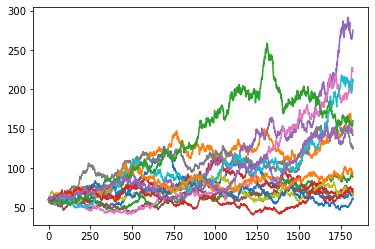

In [118]:
if __name__ == "__main__":
    num_of_simulations=15
    #int(input("how many simulations do you want to run? ->"))
    period=365*5
    #int(input("For how many days in the future do you want to run it? ->"))
    generate_simulations(num_of_simulations, period)